## Data cleaning,visualisation and preprocessing project for training predictive models for heart disease prediction

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
heart_data=pd.read_csv("heart.csv")
df=pd.DataFrame(heart_data)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## EDA 

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [9]:
df.shape

(918, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [13]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [14]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [15]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [16]:
numeric_columns=df.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

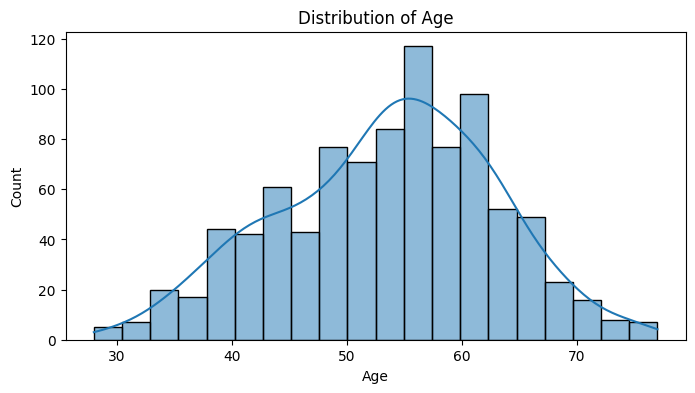

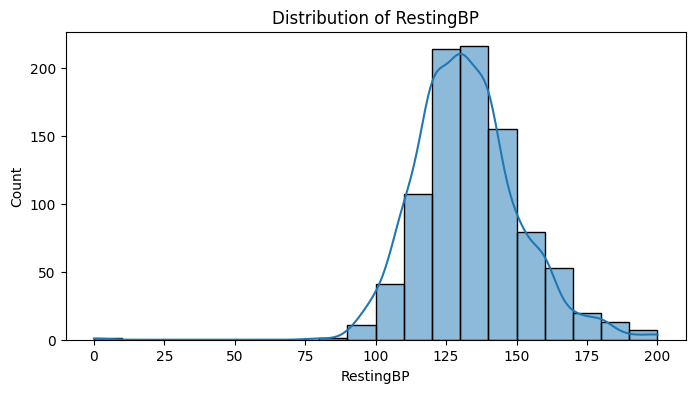

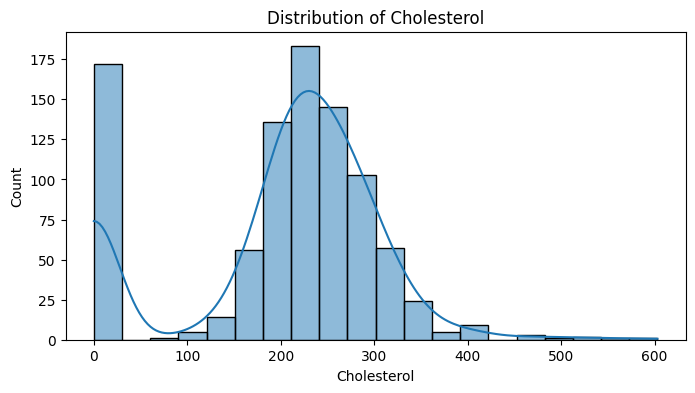

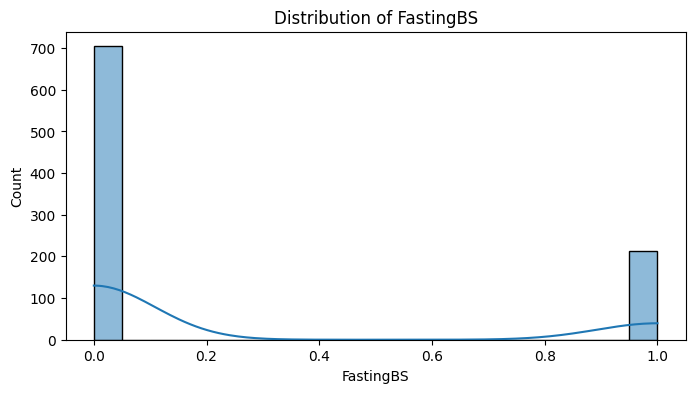

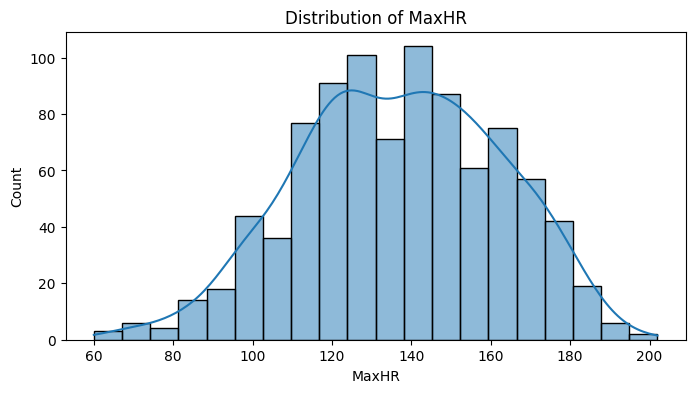

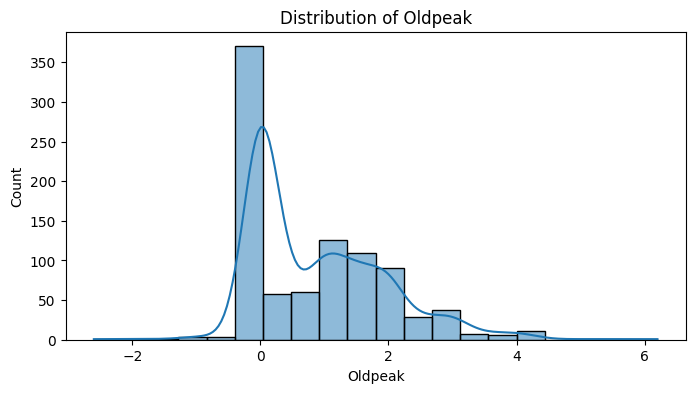

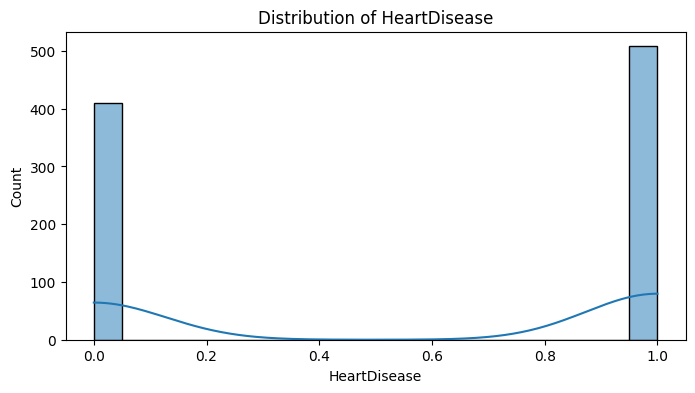

In [17]:
for col in numeric_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True,bins=20)
    plt.title(f'Distribution of {col}')

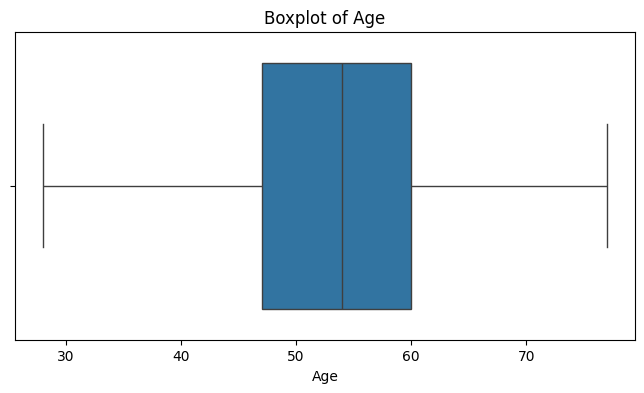

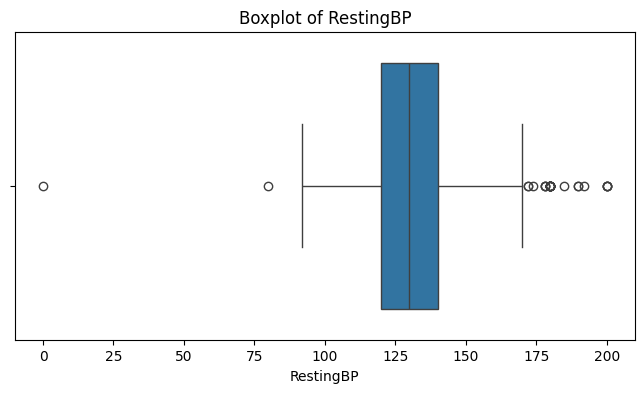

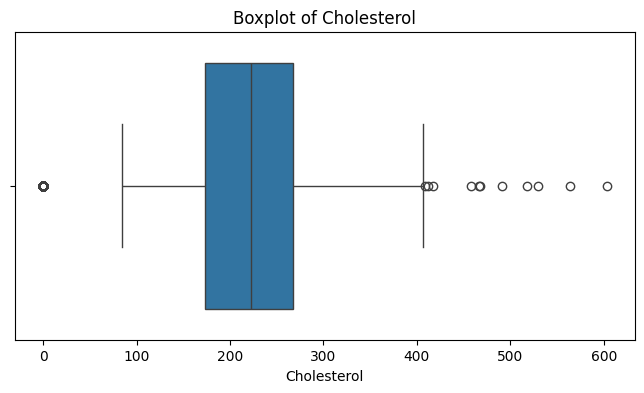

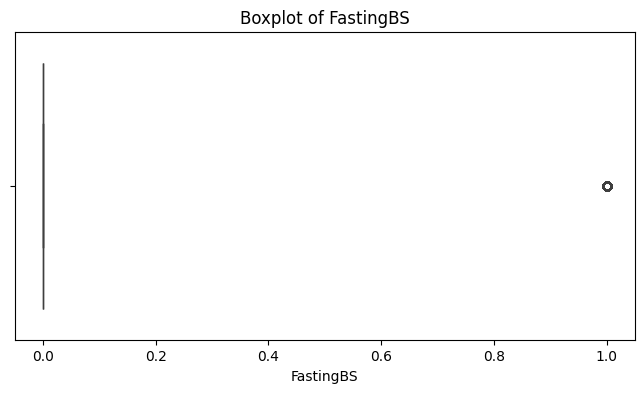

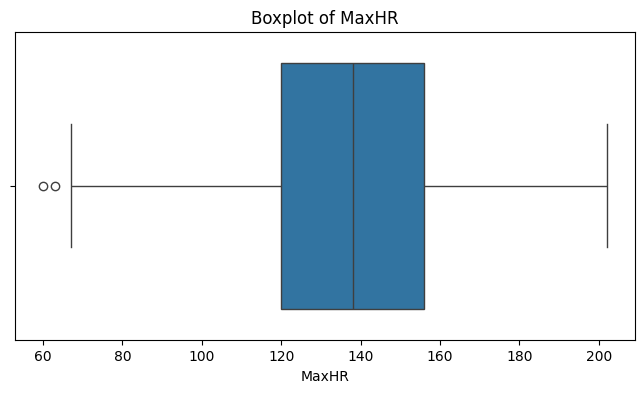

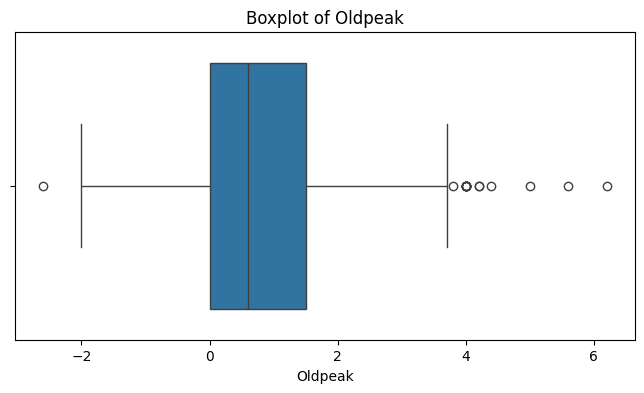

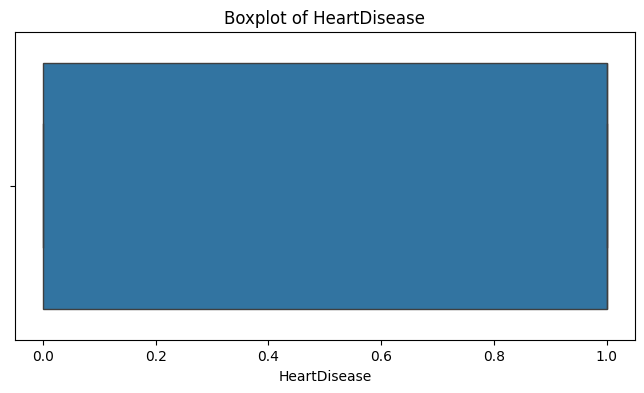

In [18]:
for col in numeric_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')


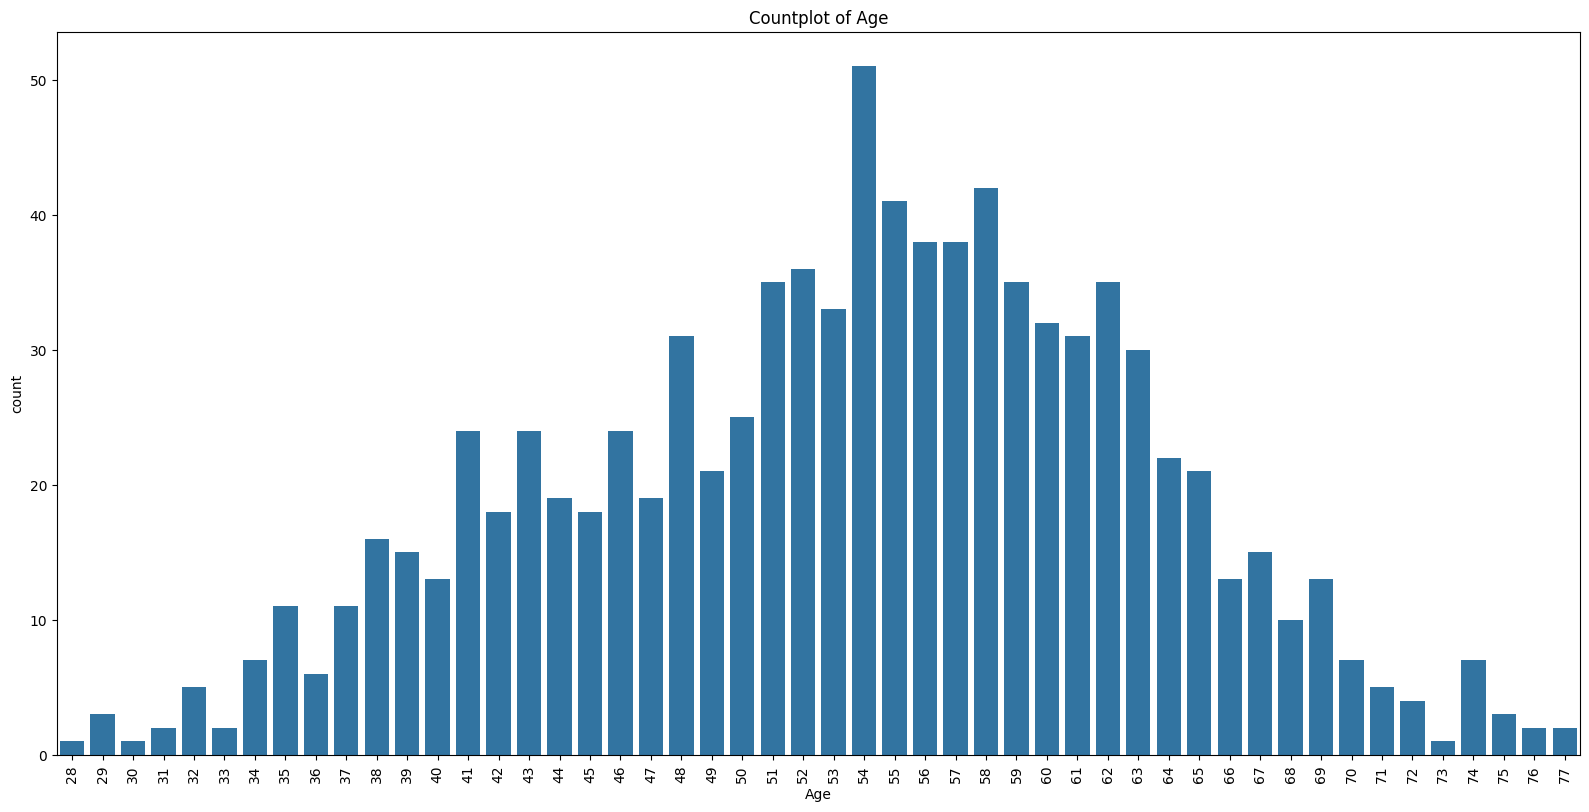

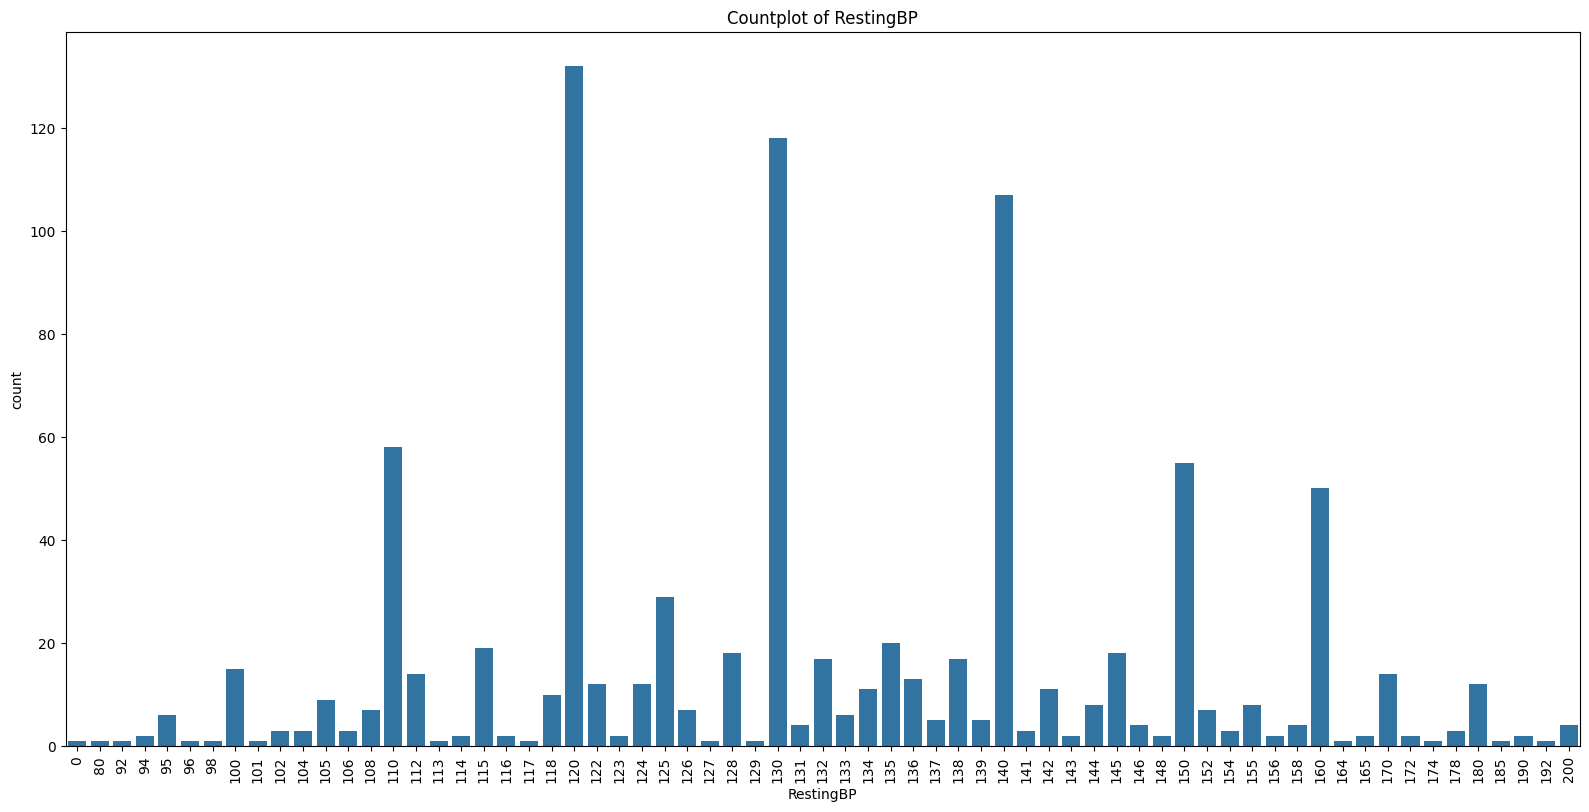

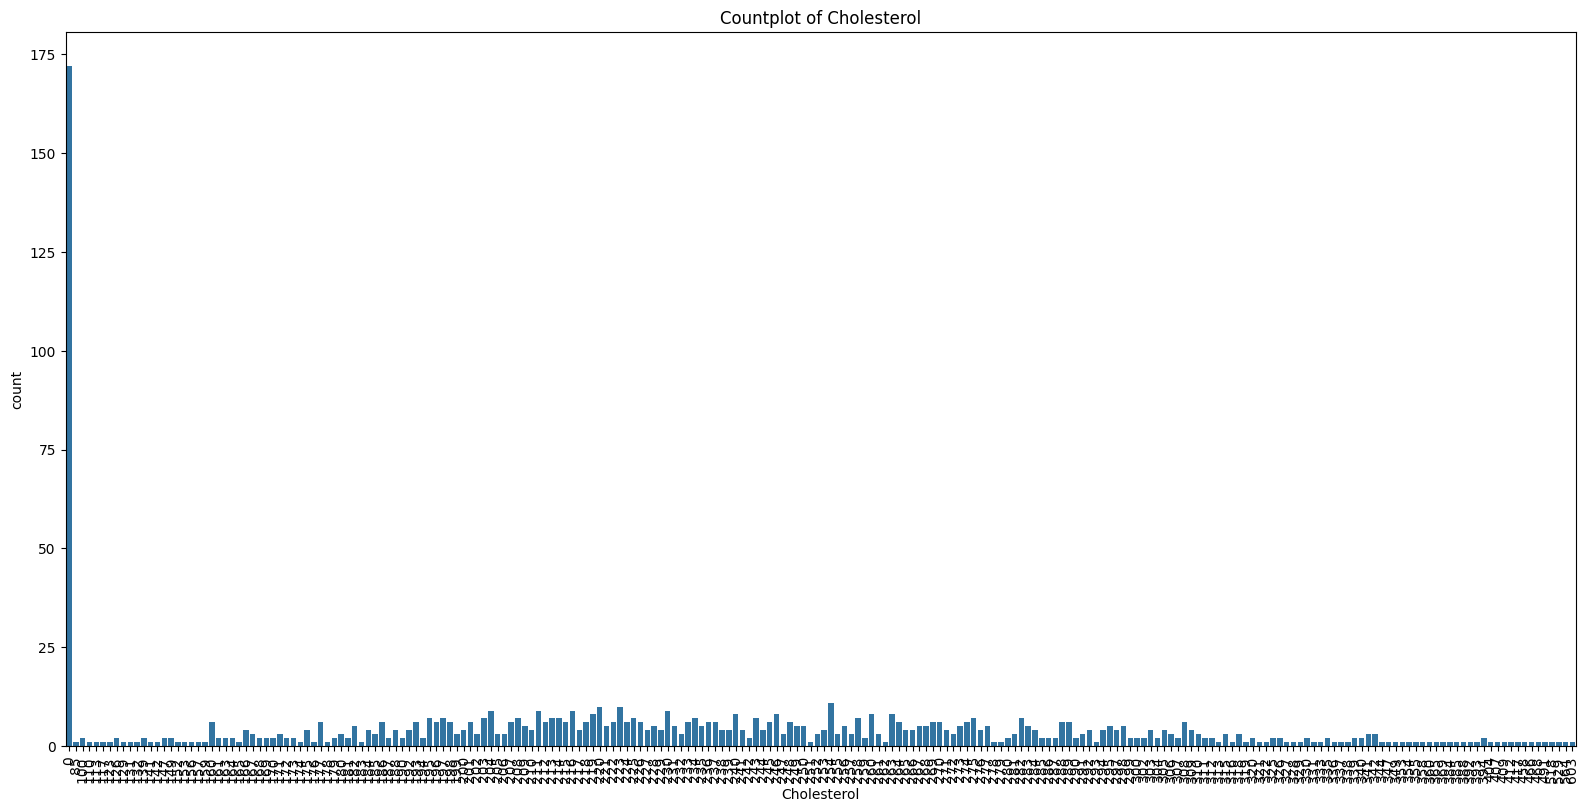

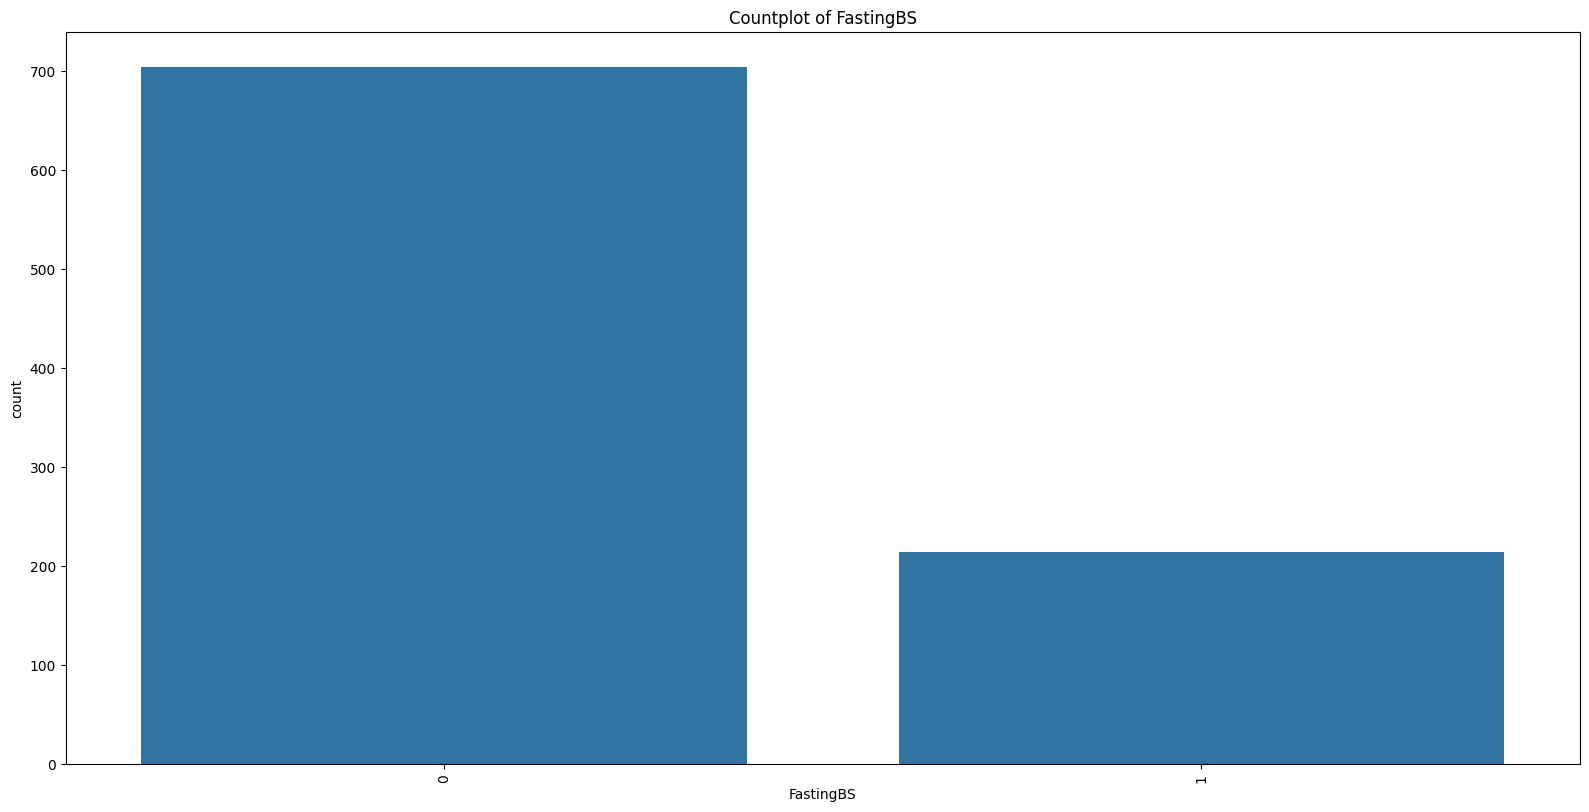

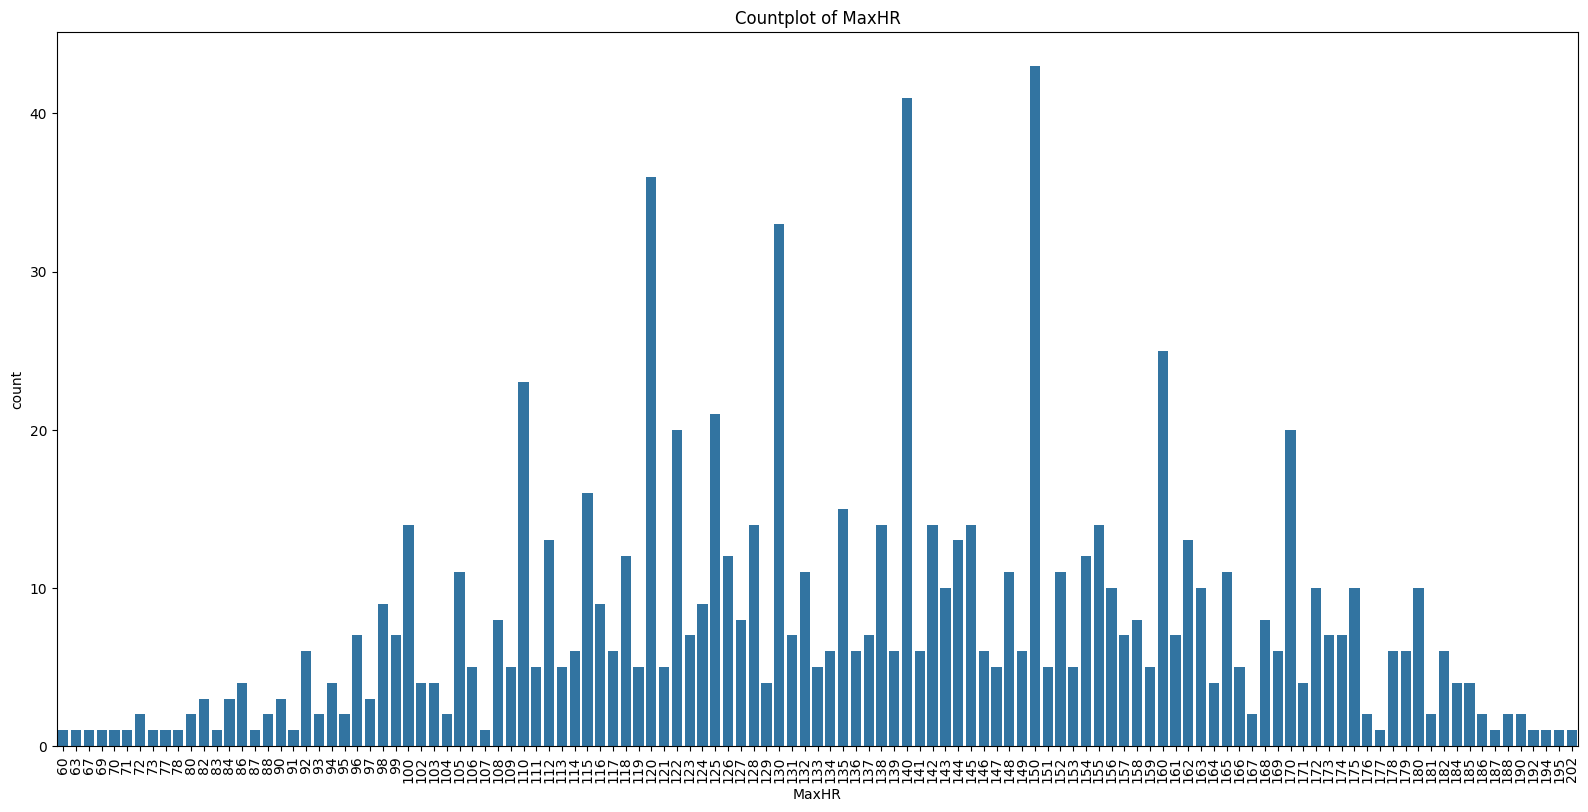

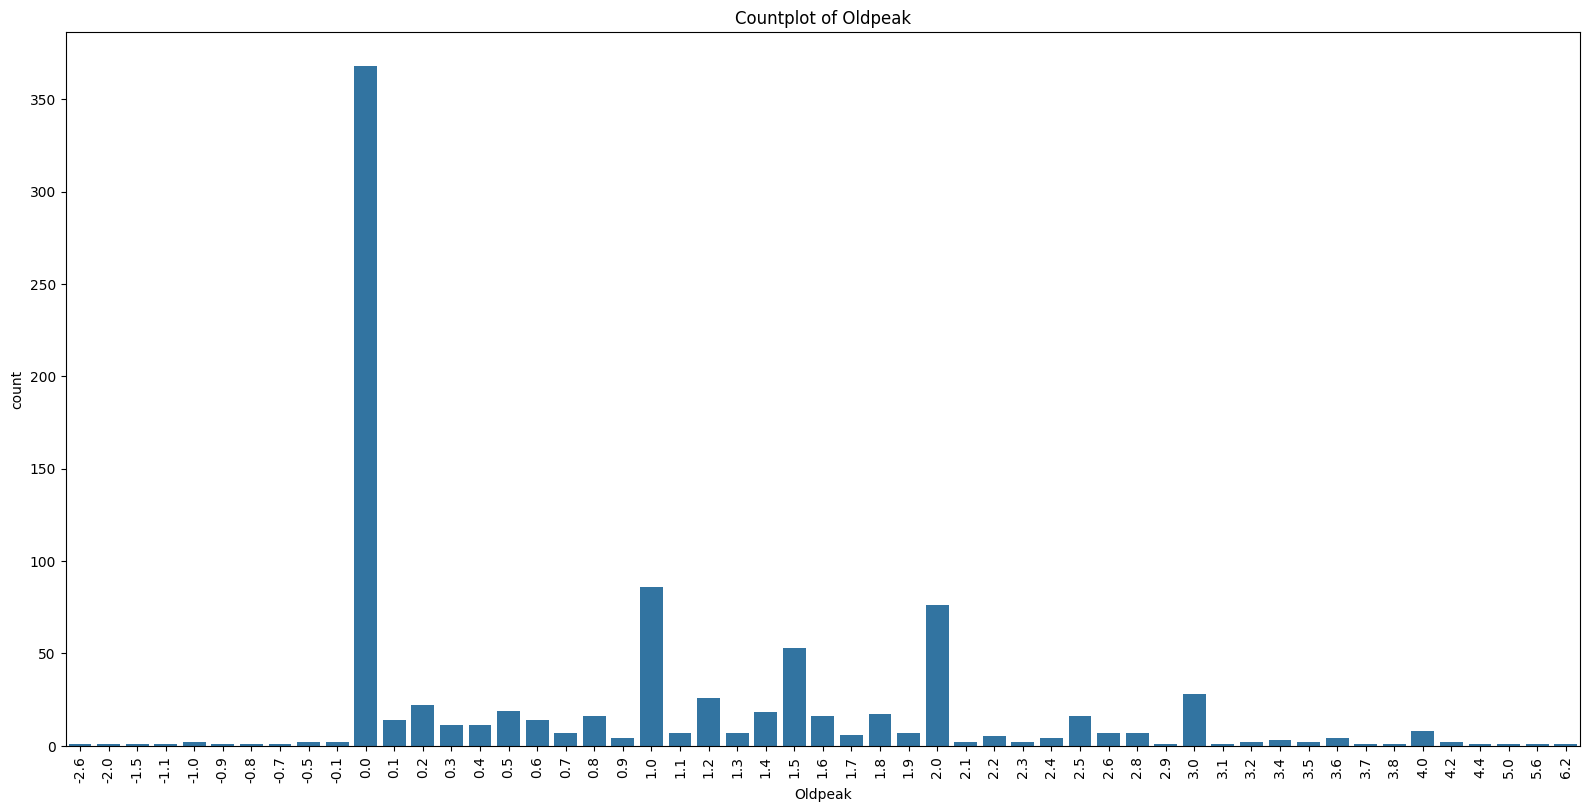

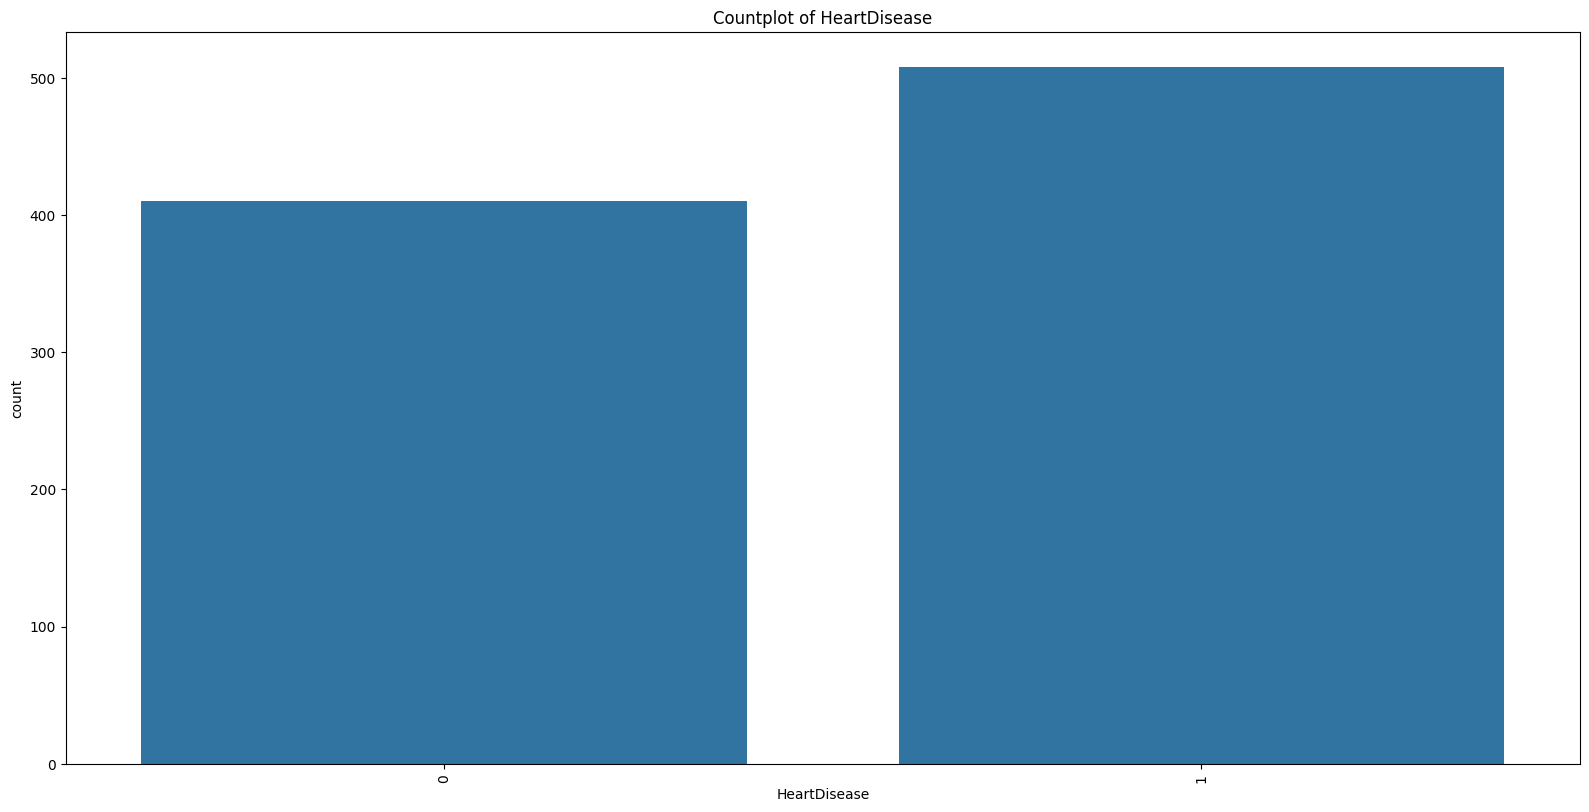

In [19]:
for col in numeric_columns:
    plt.figure(figsize=(16,8))
    sns.countplot(x=df[col])
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.title(f'Countplot of {col}')


## Data cleaning and preprocessing

In [20]:
df_cleaned=df.copy()

In [21]:
df_cleaned.shape

(918, 12)

In [22]:
df_cleaned.drop_duplicates(inplace=True)
print(df_cleaned.shape)

(918, 12)


In [23]:
df_cleaned.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Encoding the object data types and the converting to numeric form.
 1. lable encoding when only two categories are present. 
 2. one-hot encoding is done when multiple categories are present.



## Lable Encoding'Sex' and 'ExerciseAngina' column:

In [24]:
df_cleaned['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [25]:
df_cleaned['Sex']=df_cleaned['Sex'].map({"M":1,"F":0})
df_cleaned

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [26]:
df_cleaned['ExerciseAngina']=df_cleaned['ExerciseAngina'].map({"N":1,"Y":0})
df_cleaned

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,1,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,1,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,1,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,0,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,1,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,1,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,1,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,0,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,1,0.0,Flat,1


In [27]:
df['RestingECG'].value_counts()



RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [28]:
df['ChestPainType'].value_counts()



ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [29]:
df['ExerciseAngina'].value_counts()



ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [30]:
df['ST_Slope'].value_counts()



ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

## One Hot Encoding Columns:[] :

In [31]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['ChestPainType'],drop_first=True)
df_cleaned

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,1,140,289,0,Normal,172,1,0.0,Up,0,True,False,False
1,49,0,160,180,0,Normal,156,1,1.0,Flat,1,False,True,False
2,37,1,130,283,0,ST,98,1,0.0,Up,0,True,False,False
3,48,0,138,214,0,Normal,108,0,1.5,Flat,1,False,False,False
4,54,1,150,195,0,Normal,122,1,0.0,Up,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,Normal,132,1,1.2,Flat,1,False,False,True
914,68,1,144,193,1,Normal,141,1,3.4,Flat,1,False,False,False
915,57,1,130,131,0,Normal,115,0,1.2,Flat,1,False,False,False
916,57,0,130,236,0,LVH,174,1,0.0,Flat,1,True,False,False


In [32]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['ST_Slope'],drop_first=True)
df_cleaned

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,Normal,172,1,0.0,0,True,False,False,False,True
1,49,0,160,180,0,Normal,156,1,1.0,1,False,True,False,True,False
2,37,1,130,283,0,ST,98,1,0.0,0,True,False,False,False,True
3,48,0,138,214,0,Normal,108,0,1.5,1,False,False,False,True,False
4,54,1,150,195,0,Normal,122,1,0.0,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,Normal,132,1,1.2,1,False,False,True,True,False
914,68,1,144,193,1,Normal,141,1,3.4,1,False,False,False,True,False
915,57,1,130,131,0,Normal,115,0,1.2,1,False,False,False,True,False
916,57,0,130,236,0,LVH,174,1,0.0,1,True,False,False,True,False


In [33]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['RestingECG'],drop_first=True)
df_cleaned

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,1,0.0,0,True,False,False,False,True,True,False
1,49,0,160,180,0,156,1,1.0,1,False,True,False,True,False,True,False
2,37,1,130,283,0,98,1,0.0,0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,0,1.5,1,False,False,False,True,False,True,False
4,54,1,150,195,0,122,1,0.0,0,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,1,1.2,1,False,False,True,True,False,True,False
914,68,1,144,193,1,141,1,3.4,1,False,False,False,True,False,True,False
915,57,1,130,131,0,115,0,1.2,1,False,False,False,True,False,True,False
916,57,0,130,236,0,174,1,0.0,1,True,False,False,True,False,False,False


Converting all object datatype to integer

In [34]:
df_cleaned=df_cleaned.astype(int)
df_cleaned.dtypes

Age                  int64
Sex                  int64
RestingBP            int64
Cholesterol          int64
FastingBS            int64
MaxHR                int64
ExerciseAngina       int64
Oldpeak              int64
HeartDisease         int64
ChestPainType_ATA    int64
ChestPainType_NAP    int64
ChestPainType_TA     int64
ST_Slope_Flat        int64
ST_Slope_Up          int64
RestingECG_Normal    int64
RestingECG_ST        int64
dtype: object

In [35]:
df_cleaned['Cholesterol'].value_counts()

Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

This shows that 172 people have cholestrol which is not possible hence we have to remove this data . Thus we wil remove 0 amd fill it with mean of remainig correct colestrol readings.

In [36]:
ch_mean=df.loc[df['Cholesterol']!=0,'Cholesterol'].mean()
ch_mean

np.float64(244.6353887399464)

In [37]:
df_cleaned['Cholesterol']=df_cleaned['Cholesterol'].replace(0,ch_mean)
df_cleaned['Cholesterol']=df_cleaned['Cholesterol'].round(2)
df_cleaned['Cholesterol'].value_counts()

Cholesterol
244.64    172
254.00     11
220.00     10
223.00     10
204.00      9
         ... 
353.00      1
278.00      1
157.00      1
176.00      1
131.00      1
Name: count, Length: 222, dtype: int64

In [38]:
df_cleaned['RestingBP'].value_counts()

RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
101      1
117      1
192      1
129      1
164      1
Name: count, Length: 67, dtype: int64

In [39]:
BP_mean=df.loc[df['RestingBP']!=0,'RestingBP'].mean()
BP_mean

np.float64(132.54089422028352)

In [40]:

df_cleaned['RestingBP']=df_cleaned['RestingBP'].replace(0,ch_mean)
df_cleaned['RestingBP']=df_cleaned['RestingBP'].round(2)
df_cleaned['RestingBP'].value_counts()

RestingBP
120.0    132
130.0    118
140.0    107
110.0     58
150.0     55
        ... 
101.0      1
117.0      1
192.0      1
129.0      1
164.0      1
Name: count, Length: 67, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

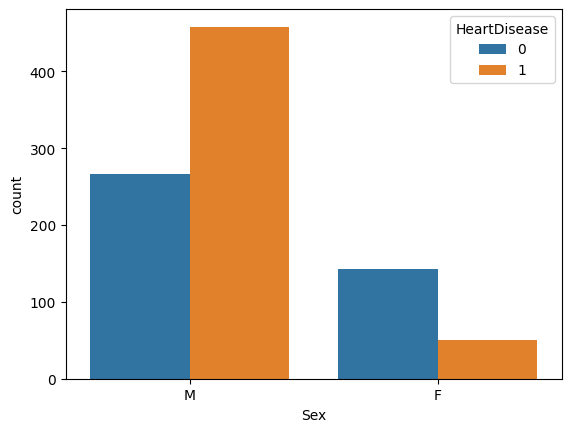

In [41]:
sns.countplot(x=df['Sex'],hue=df['HeartDisease'])  ## 

<Axes: xlabel='FastingBS', ylabel='count'>

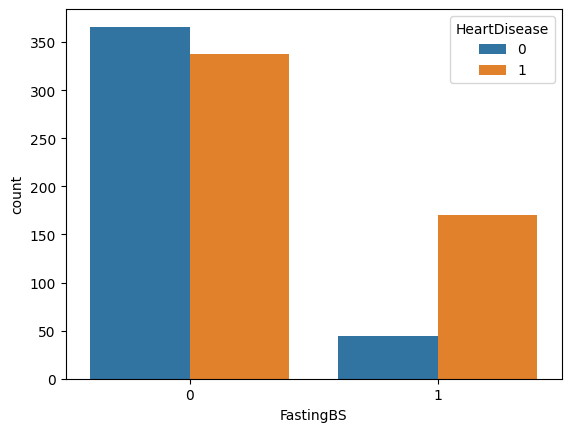

In [42]:
sns.countplot(x=df['FastingBS'],hue=df['HeartDisease'])  ## 

<Axes: xlabel='FastingBS', ylabel='count'>

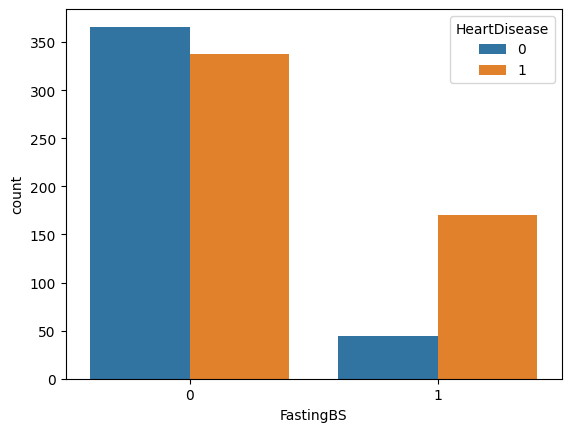

In [43]:
sns.countplot(x=df['FastingBS'],hue=df['HeartDisease'])  

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

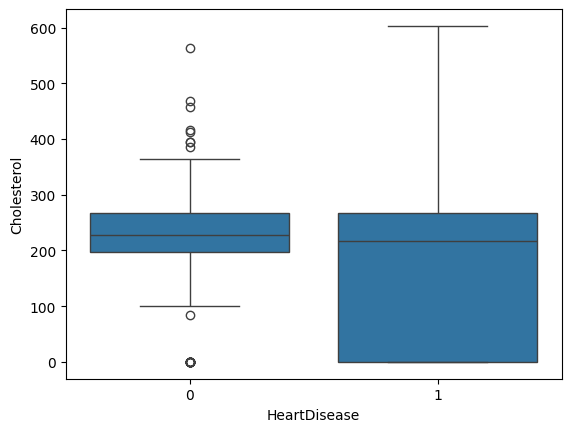

In [44]:
sns.boxplot(x=df['HeartDisease'], y=df['Cholesterol'],data=df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

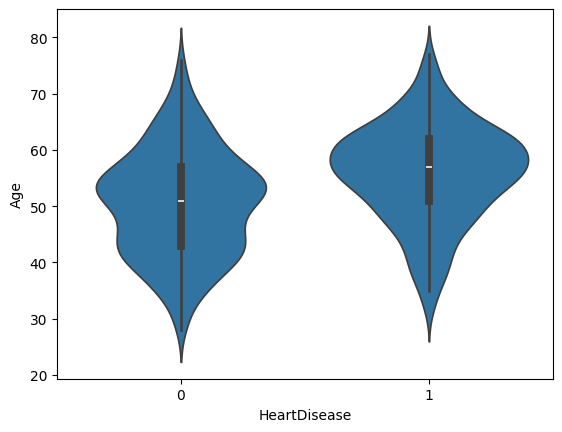

In [45]:
sns.violinplot(x=df['HeartDisease'],y=df['Age'],data=df)

<Axes: >

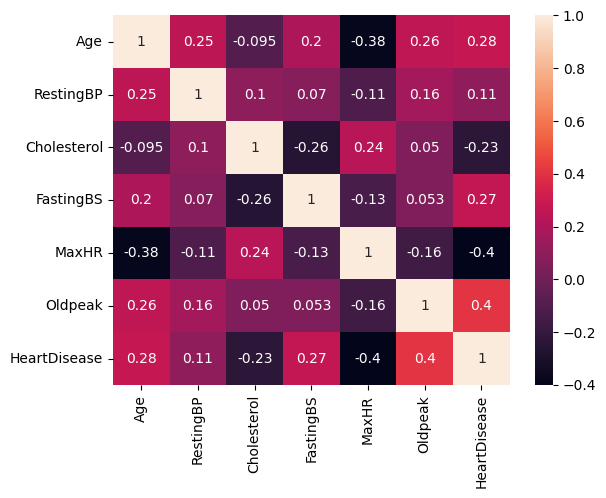

In [46]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## Standardizing  continious variables

In [47]:
from sklearn.preprocessing import StandardScaler
Cont_variable=['Age','RestingBP','Cholesterol','Oldpeak','MaxHR']
scaler=StandardScaler()
df_cleaned[Cont_variable]=scaler.fit_transform(df_cleaned[Cont_variable])
df_cleaned

## ML Model training dataset is ready.

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST
0,-1.433140,1,0.399696,0.832513,0,1.382928,1,-0.727592,0,1,0,0,0,1,1,0
1,-0.478484,0,1.489232,-1.212938,0,0.754157,1,0.282891,1,0,1,0,1,0,1,0
2,-1.751359,1,-0.145072,0.719919,0,-1.525138,1,-0.727592,0,1,0,0,0,1,0,1
3,-0.584556,0,0.290742,-0.574908,0,-1.132156,0,0.282891,1,0,0,0,1,0,1,0
4,0.051881,1,0.944464,-0.931454,0,-0.581981,1,-0.727592,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,-1.234608,0.363372,0,-0.188999,1,0.282891,1,0,0,1,1,0,1,0
914,1.536902,1,0.617603,-0.968986,1,0.164684,1,2.303858,1,0,0,0,1,0,1,0
915,0.370100,1,-0.145072,-2.132453,0,-0.857069,0,0.282891,1,0,0,0,1,0,1,0
916,0.370100,0,-0.145072,-0.162065,0,1.461525,1,-0.727592,1,1,0,0,1,0,0,0


In [50]:
X=df_cleaned.drop('HeartDisease',axis=1)
y=df_cleaned['HeartDisease']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



In [61]:
Models={
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Naive Byes":GaussianNB(),
    "Decision Tree":DecisionTreeClassifier(),
    "SVM":SVC() 

}

In [59]:
result=[]

In [64]:
for name,model in Models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_pred,y_test)
    f1=f1_score(y_pred,y_test)
    result.append(
                     {'model':name,'accuracy':round(acc,4),'f1 score':round(f1,4)}
    )


In [65]:
result

[{'model': 'Logistic Regression', 'accuracy': 0.8587, 'f1 score': 0.8738},
 {'model': 'KNN', 'accuracy': 0.8478, 'f1 score': 0.8667},
 {'model': 'Naive Byes', 'accuracy': 0.8478, 'f1 score': 0.8614},
 {'model': 'Decision Tree', 'accuracy': 0.7935, 'f1 score': 0.8061},
 {'model': 'SVM', 'accuracy': 0.8478, 'f1 score': 0.8679}]

## Pickling

In [68]:
import joblib
joblib.dump(Models['Logistic Regression'],'Logistic_reg_pred.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X.columns.tolist(),'COLUMNS.pkl')

['COLUMNS.pkl']